In [ ]:
import matplotlib.pyplot as plt

class BaseAxPlot:
    def __init__(self, figsize=(10, 6), bg_color='white', grid=True):
        # Figure, Axes 생성
        self.fig, self.ax = plt.subplots(figsize=figsize)
        # 기본 배경 세팅
        self.set_background(bg_color)
        self.set_grid(grid)
        self.set_axes_style()

    def set_background(self, color):
        """배경색 설정"""
        self.fig.patch.set_facecolor(color)   # Figure 배경색
        self.ax.set_facecolor(color)           # Axes 배경색

    def set_grid(self, show=True):
        """격자 표시 여부 설정"""
        self.ax.grid(show, linestyle='--', alpha=0.7)

    def set_axes_style(self):
        """축 스타일 기본 설정 (필요하면 추가 가능)"""
        self.ax.tick_params(axis='both', which='major', labelsize=10)
        # 예: 축 spine 색, 두께 변경 가능
        for spine in self.ax.spines.values():
            spine.set_edgecolor('gray')
            spine.set_linewidth(1)

    def plot(self, *args, **kwargs):
        raise NotImplementedError("Subclasses must implement plot()")

    def show(self):
        # plt.figure(layout="constrained")
        plt.tight_layout()
        plt.show()


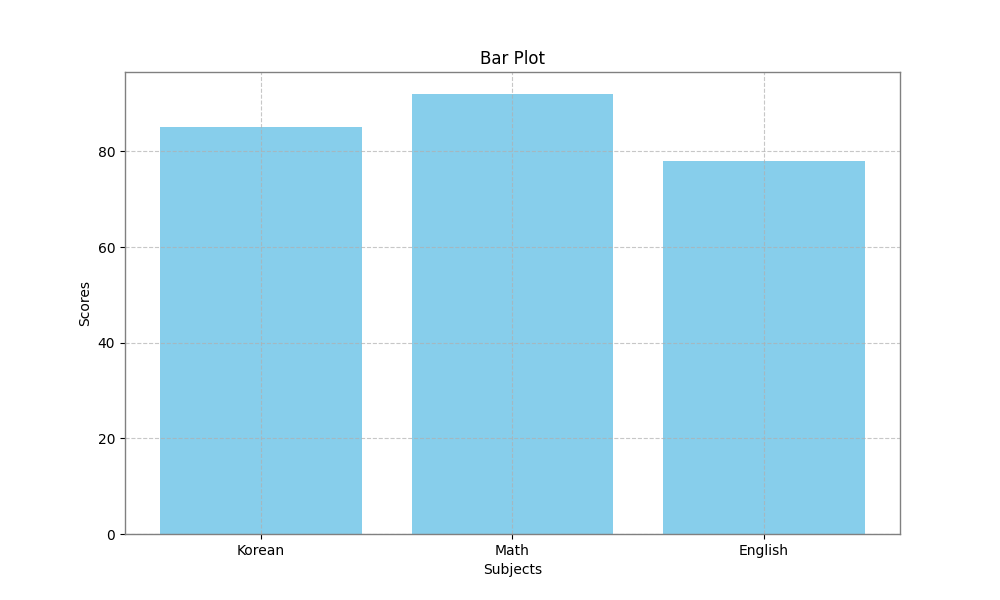

In [31]:
class BarPlot(BaseAxPlot):
    def __init__(self, subjects, scores):
        super().__init__()
        self.subjects = subjects
        self.scores = scores

    def plot(self, title='Bar Plot'):
        self.ax.bar(self.subjects, self.scores, color='skyblue')
        self.ax.set_title(title)
        self.ax.set_xlabel('Subjects')
        self.ax.set_ylabel('Scores')

# 실행
bar = BarPlot(['Korean', 'Math', 'English'], [85, 92, 78])
bar.plot()
bar.show()


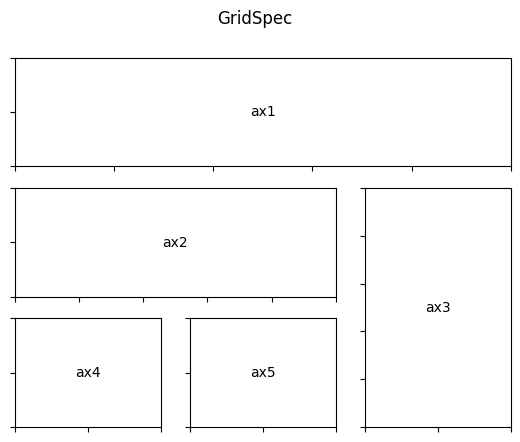

In [ ]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained")


gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

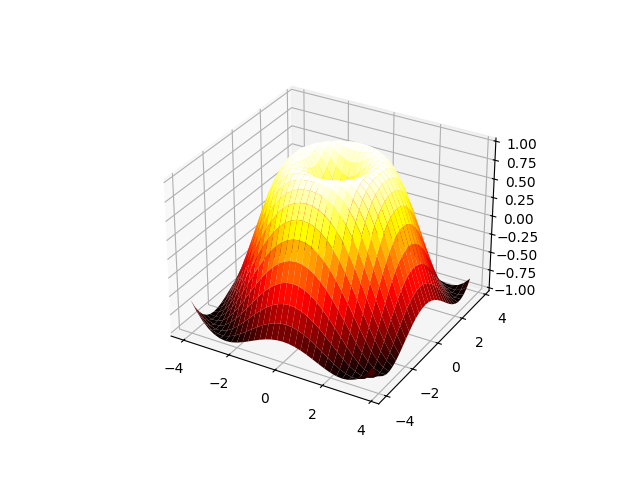

In [15]:
%matplotlib widget


import numpy as np
import matplotlib.pyplot as plt

# 3D Axes를 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# 3D Surface Plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

# 저장 (선택 사항)
# plt.savefig("plot.png", dpi=300)

# 보여주기
plt.show()
